# Trabajo 1: Preprocesamiento y evaluación de clasificadores 


**Integrantes del grupo:**

- Monya Tayebi Hillali
- Alicia Jiajun Lorenzo Lourido

### ***Librerías utilizadas***

In [1]:
# base 
import math
import pandas as pd
import numpy as np
# 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mi
#
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
# filtros
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectFpr
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFwe
# wrappers
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
# resample
from sklearn.utils import resample

# evaluation 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Modelos 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# Almacenamiento de modelos 
import pickle



In [2]:
# Variables globales
SEED_VALUE = 28
PATH_DATA = './data/datos_accidentes_cerebrovasculares.csv'

### ***Carga de datos***

In [3]:
datos = pd.read_csv(PATH_DATA, sep=',')

### ***Análisis descriptivo de los datos***
***Información de los datos***

Comenzamos viendo los datos en la tabla ,  el número de filas y columnas de nuestro dataset : 

In [4]:
datos

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

Vemos como tenemos los datos de 5110 pacientes y los valores de 11 parámetros de entrada distintos y 1 de salida. 

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


En cuanto a los parámetros del dataset, podemos ver con info() los tipos de datos...

*Consideramos que Unknown es la cuarta categoría*

Modificamos los datos categóricos a numericos para poder utilizarlos posteriormente en los diversos métodos:

In [6]:
def get_dict_of_relation_value_and_numeric(dataframe,column):
    return {value:number for number,value in enumerate(dataframe[column].unique())}
def transform_data_of_column_to_numeric(dataframe,column):
    dataframe[column] = dataframe[column].map(get_dict_of_relation_value_and_numeric(dataframe, column)) 
def transform_data_to_numeric(dataframe,column_list):
    for column in column_list:
        transform_data_of_column_to_numeric(dataframe, column)

In [7]:
datos_tranform = datos.copy() 
column_list=['gender','ever_married','work_type','Residence_type','smoking_status']
transform_data_to_numeric(datos_tranform, column_list)
#datos1['gender'] = datos1['gender'].map({'Female': 0, 'Male': 1, 'Other': 2})
#datos1['ever_married'] = datos1['ever_married'].map({'No': 0, 'Yes': 1})
#datos1['work_type'] = datos1['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4})
#datos1['Residence_type'] = datos1['Residence_type'].map({'Rural': 0, 'Urban': 1})
#datos1['smoking_status'] = datos1['smoking_status'].map({'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3})

In [8]:
datos_tranform.head()

id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       0  67.0             0              1             0          0   
1  51676       1  61.0             0              0             0          1   
2  31112       0  80.0             0              1             0          0   
3  60182       1  49.0             0              0             0          0   
4   1665       1  79.0             1              0             0          1   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               0             228.69  36.6               0       1  
1               1             202.21   NaN               1       1  
2               1             105.92  32.5               1       1  
3               0             171.23  34.4               2       1  
4               1             174.12  24.0               1       1

/home/alourido/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


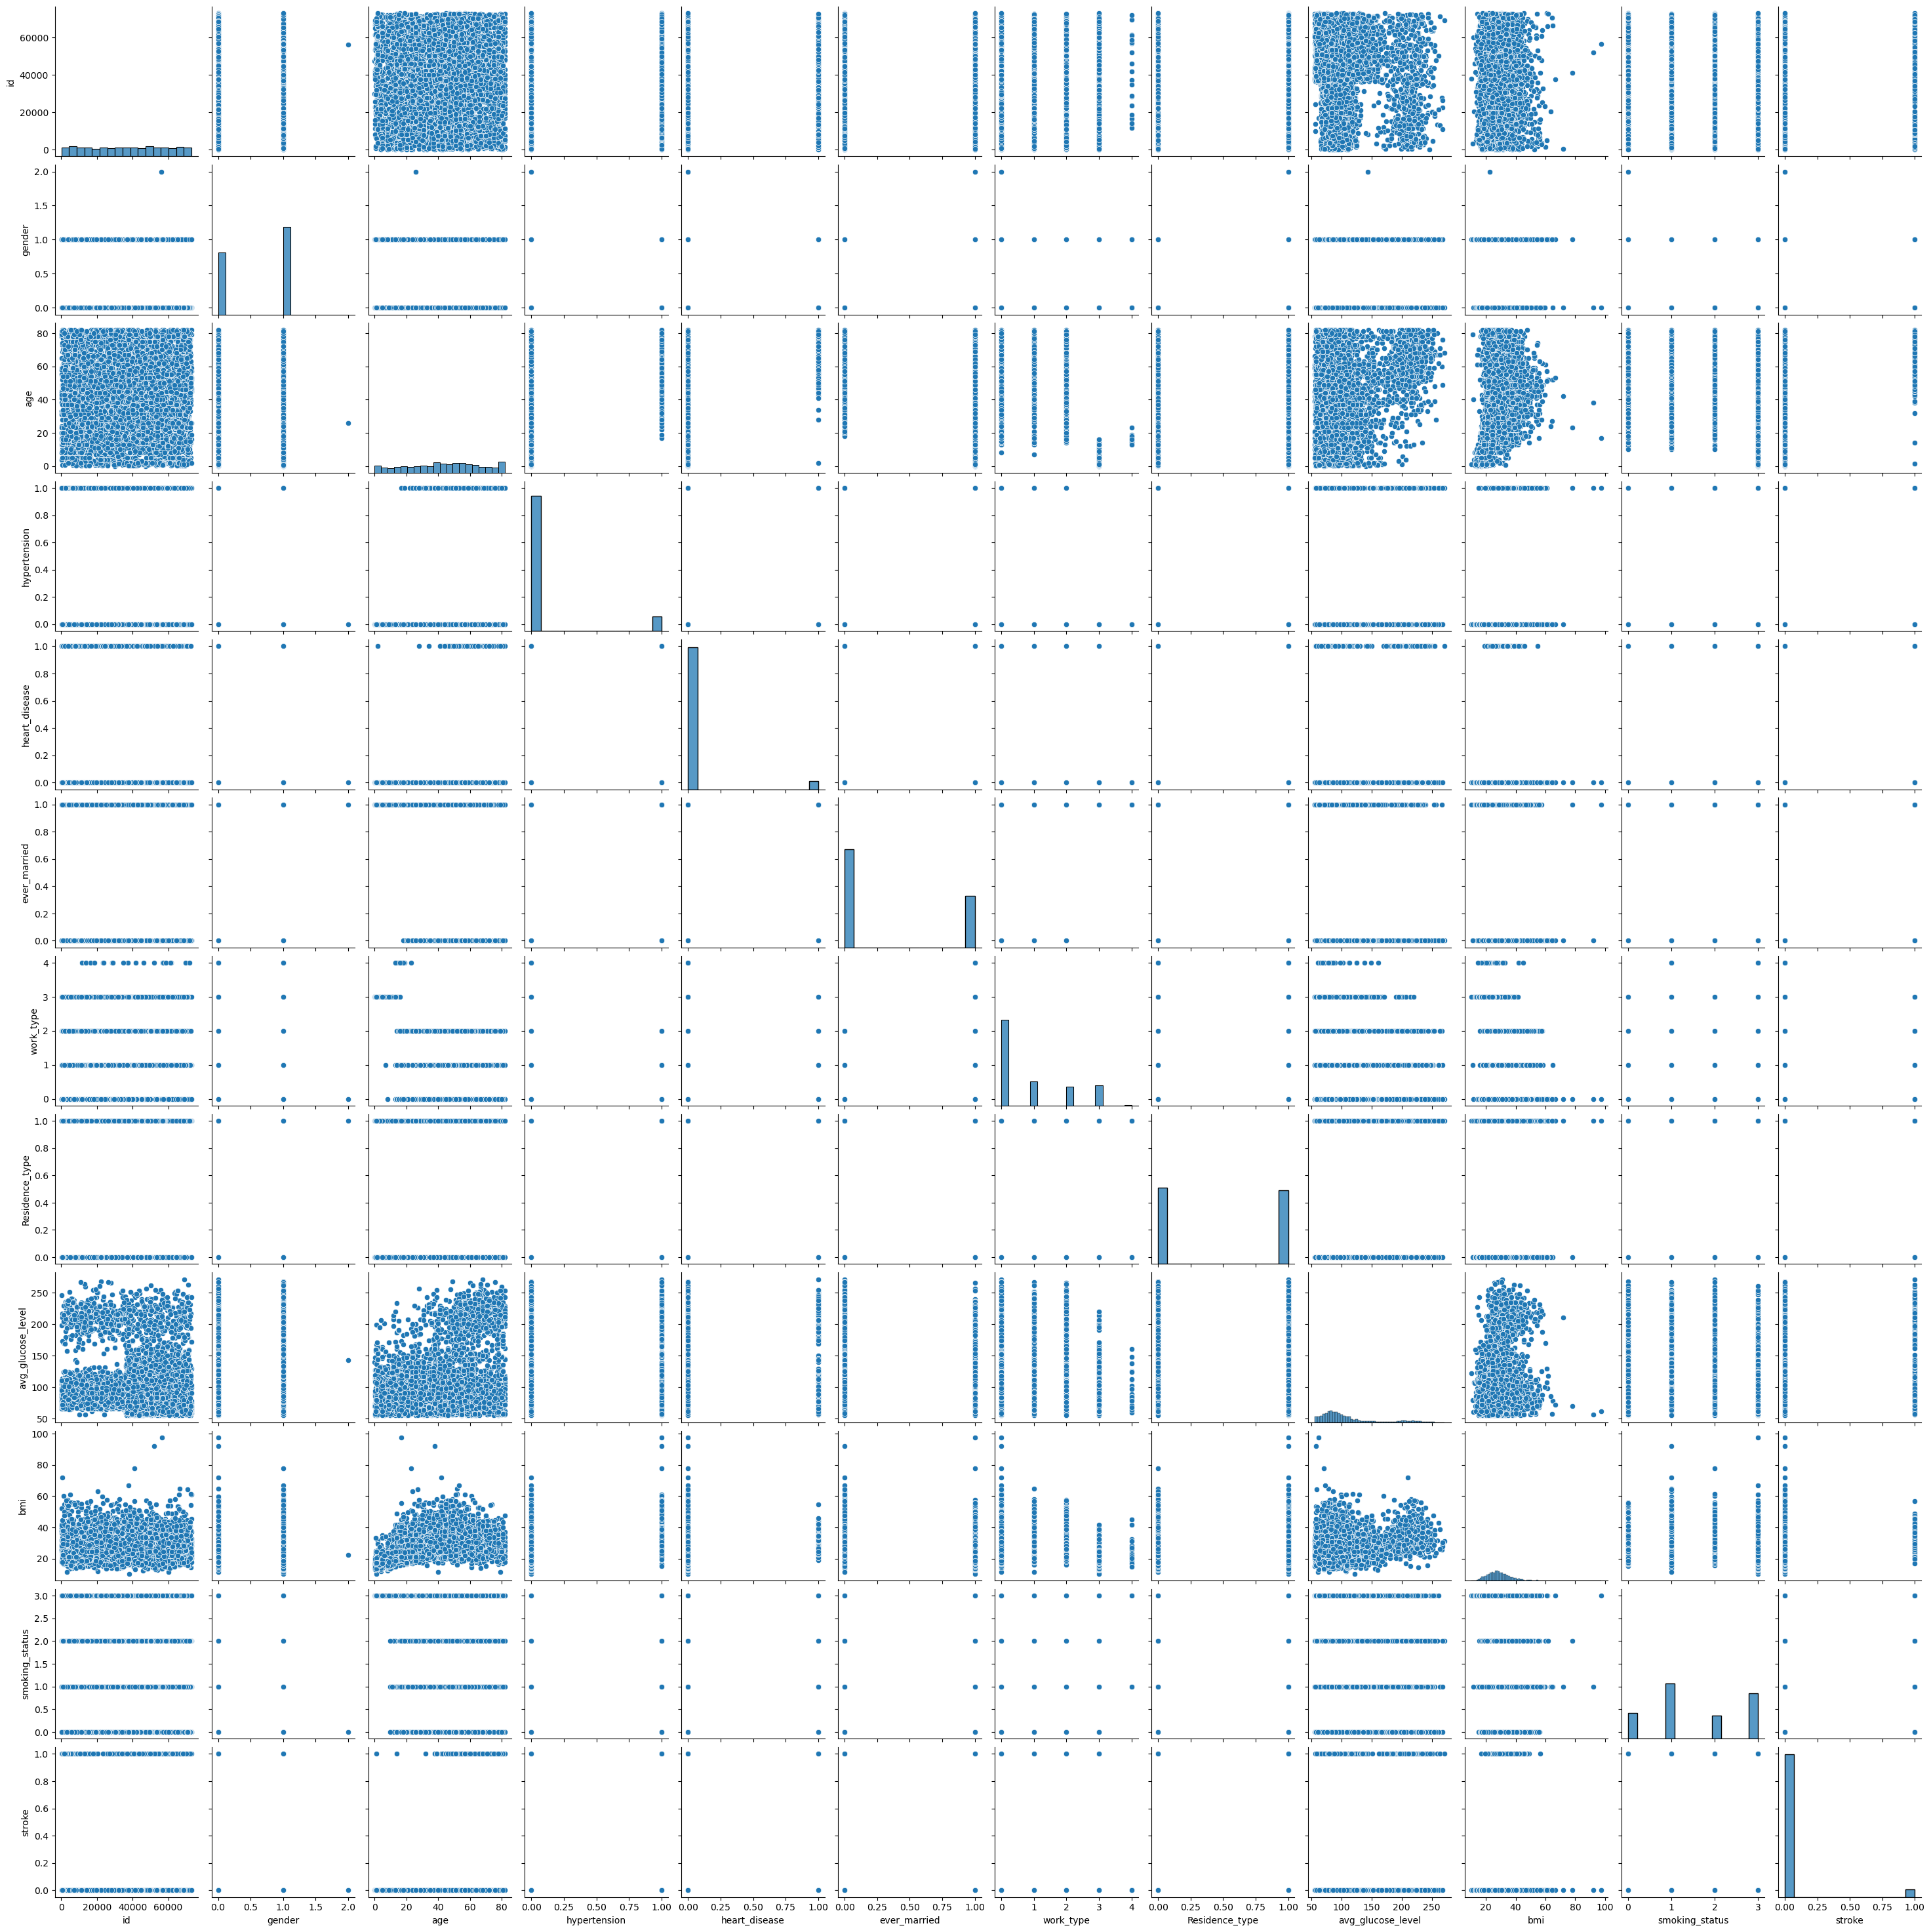

In [9]:
sns.pairplot(datos_tranform)

En este primer gráfico podemos ver como muchos de los sub-gráficos no aportan información clara sobre el conjunto de datos pero sí que podemos destacar la representación de las variables *stroke* y *age* donde vemos que a partir de los 40 años es donde los ataques son más frecuentes así como en el gráfico de los pares de variables *stroke* y *bmi* donde los ataques son más frecuentes para índices de masa corporal entre 20 y 60.

##### ***Información de los atributos***

In [10]:
def count_unique_values_column(data,column):
    # Verificar si la columna existe en el DataFrame
    if column not in data.columns:
        return "La columna especificada no existe en el DataFrame."
    # Obtener los valores únicos y contar su frecuencia
    unique_values_counts = data[column].value_counts().to_dict()
    return unique_values_counts

def compare_two_columns(data,column_name_1,column_name_2):
    values_uniques_1=data[column_name_1].unique()
    values={}
    for value_unique in values_uniques_1:
        values[value_unique]=count_unique_values_column(data[data[column_name_1]==value_unique],column_name_2)
    return values
def create_dataframe_from_dict(values,column_name_1):
    result_df = pd.DataFrame(values).T.fillna(0).astype(int)
    result_df.index.name = column_name_1
    
    return result_df
def plot_bar_comparative(data,column_name_1,column_name_2='stroke'):
    # Graficar
    data_comparate=compare_two_columns(data,column_name_1,column_name_2)
    print(data_comparate)
    resultado=create_dataframe_from_dict(data_comparate,column_name_1)
    
    resultado.plot(kind='bar')
    plt.title('Comparación de valores de "stroke" por {}'.format(column_name_1))
    plt.xlabel(column_name_1)
    plt.ylabel('Cantidad')
    plt.xticks(rotation=0)
    plt.legend(title='Stroke')
    plt.show()

In [11]:
# Definir función personalizada para pairplot con colores diferenciados por 'stroke'
def custom_pairplot(data, hue):
    sns.set(style="ticks")
    sns.pairplot(data, hue=hue, palette={0: 'blue', 1: 'red'})

# Definir función personalizada para pairplot con colores diferenciados por 'stroke' y puntos transparentes
def custom_pairplot_1(data, hue):
    sns.set(style="ticks")
    sns.pairplot(data, hue=hue, palette={0: 'blue', 1: 'red'}, plot_kws={'alpha': 0.5})

    
def custom_pairplot_2(data, hue):
    def custom_scatter(x, y, hue, **kwargs):
        plt.scatter(x, y, alpha=0.5 if hue.iloc[0] == 0 else 1, **kwargs)

    sns.pairplot(data, hue=hue, palette={0: 'blue', 1: 'red'}, plot_kws={'scatter_kws': {'alpha': 0.5}}, diag_kind='hist', diag_kws={'alpha': 0.5})
    # Sobrescribir la función scatter de seaborn para aplicar alpha condicionalmente
    
def custom_pairplot_3(data, hue):
    def custom_scatter(x, y, hue, **kwargs):
        if hue.iloc[0] == 0:
            kwargs['alpha'] = 0.5
        plt.scatter(x, y, **kwargs)

    sns.pairplot(data, hue=hue, palette={0: 'blue', 1: 'red'})
    # Sobrescribir la función scatter de seaborn para aplicar alpha condicionalmente
    for ax in plt.gcf().get_axes():
        ax.scatter = custom_scatter
    


{'Male': {0: 2007, 1: 108}, 'Female': {0: 2853, 1: 141}, 'Other': {0: 1}}


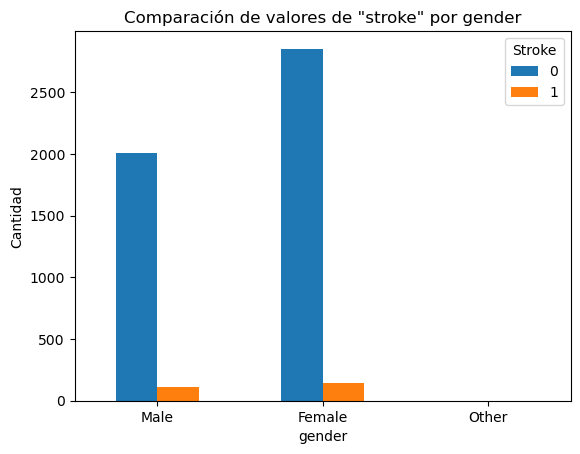

{0: {0: 4429, 1: 183}, 1: {0: 432, 1: 66}}


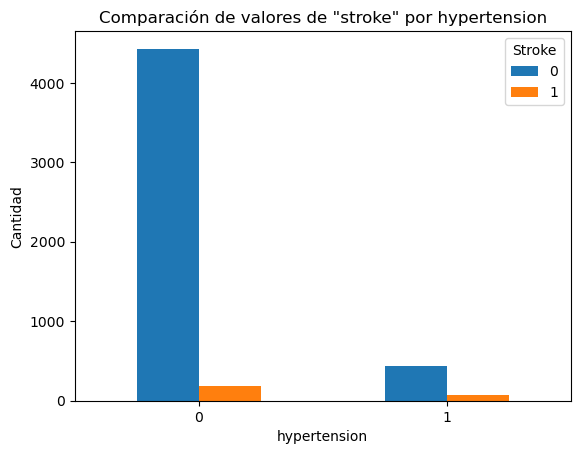

{1: {0: 229, 1: 47}, 0: {0: 4632, 1: 202}}


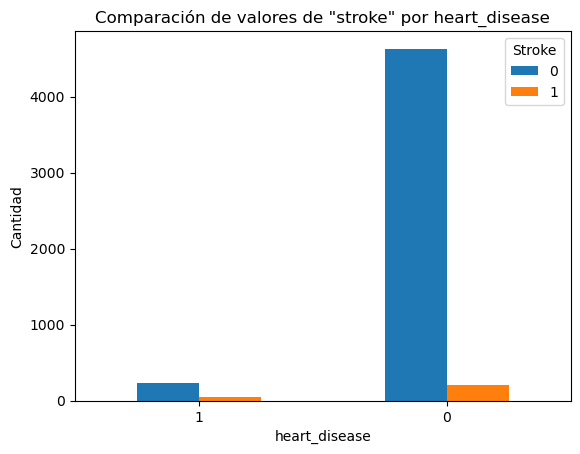

{'Yes': {0: 3133, 1: 220}, 'No': {0: 1728, 1: 29}}


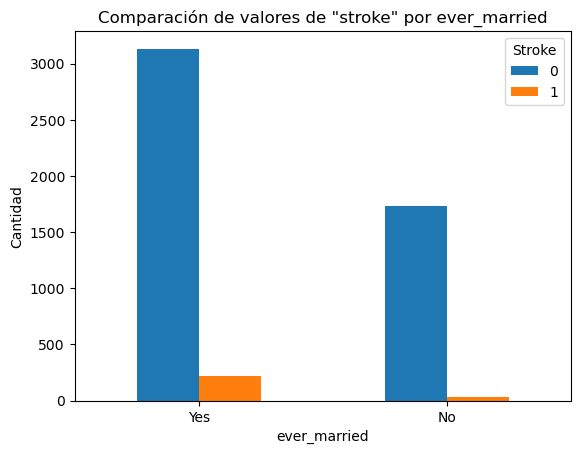

{'Private': {0: 2776, 1: 149}, 'Self-employed': {0: 754, 1: 65}, 'Govt_job': {0: 624, 1: 33}, 'children': {0: 685, 1: 2}, 'Never_worked': {0: 22}}


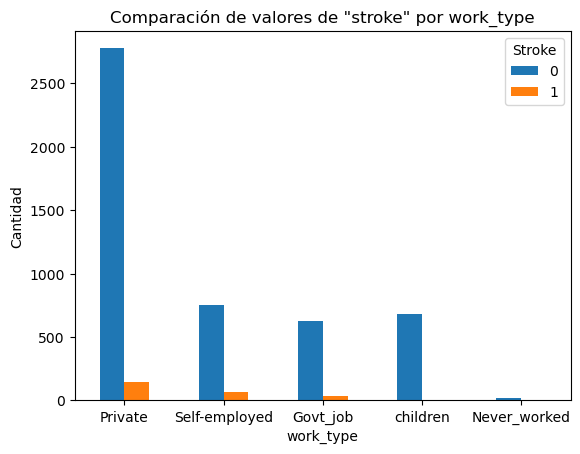

{'Urban': {0: 2461, 1: 135}, 'Rural': {0: 2400, 1: 114}}


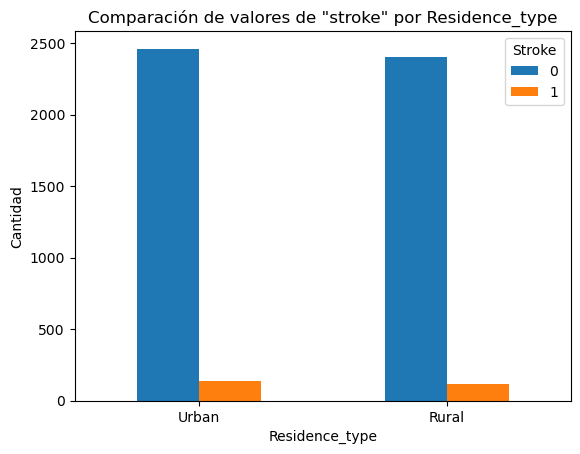

{'formerly smoked': {0: 815, 1: 70}, 'never smoked': {0: 1802, 1: 90}, 'smokes': {0: 747, 1: 42}, 'Unknown': {0: 1497, 1: 47}}


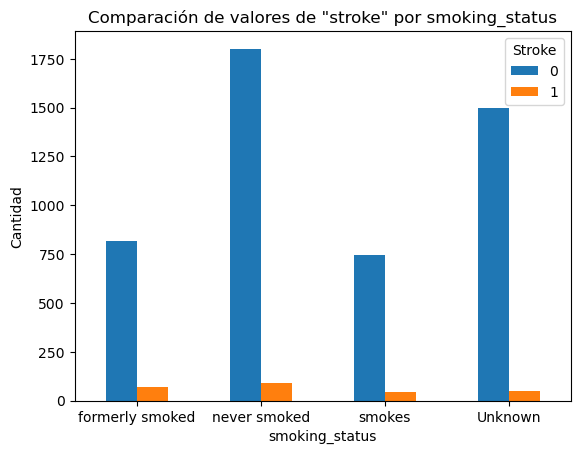

In [12]:
for column in datos.columns:
    if len(datos[column].unique())<10 and column!='stroke':
        plot_bar_comparative(datos,column)

/home/alourido/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

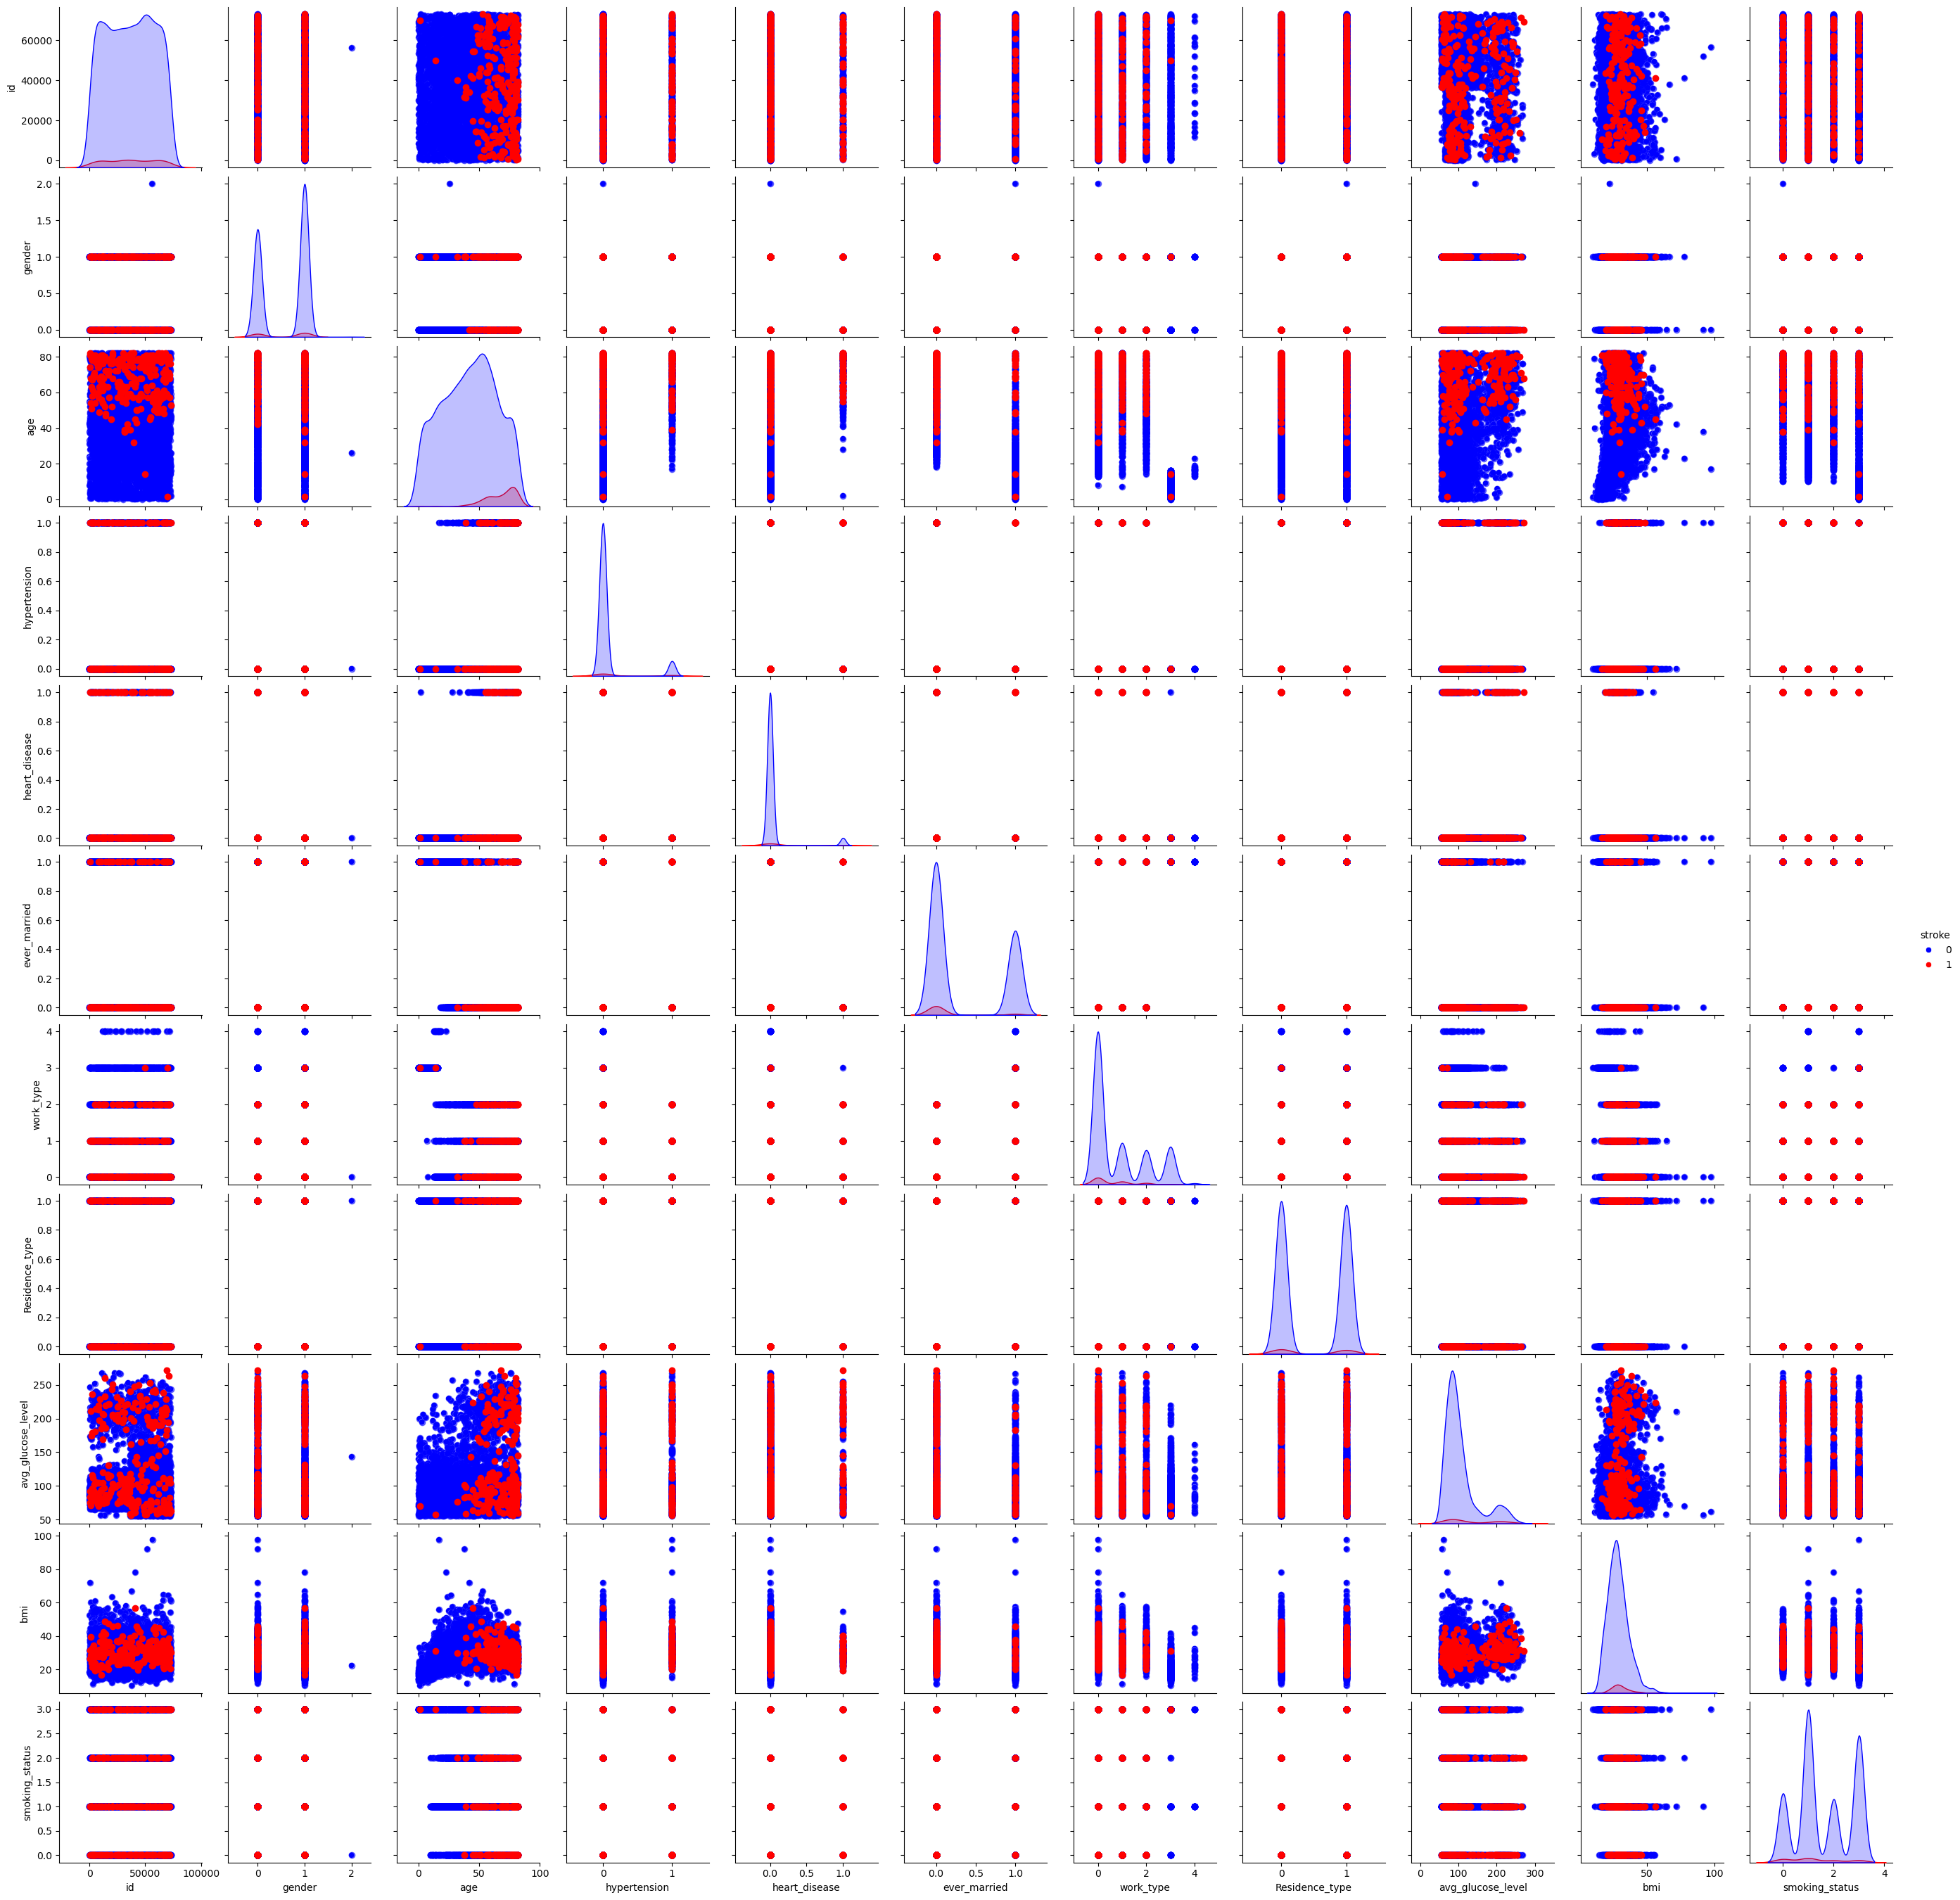

In [13]:
# Graficar
plt.figure(figsize=(12, 6))
# Filtrar datos donde 'stroke' es igual a 0
df_stroke_0 = datos_tranform[datos_tranform['stroke'] == 0]

# Crear pairplot
g = sns.pairplot(data=datos_tranform, hue='stroke', palette={0: 'blue', 1: 'red'})

# Superponer puntos donde 'stroke' es igual a 1 sobre el pairplot
for i in range(len(g.axes)):
    for j in range(len(g.axes)):
        if i != j:
            g.axes[i, j].scatter(df_stroke_0.iloc[:, j], df_stroke_0.iloc[:, i], c='blue', alpha=0.5, label='Stroke 0')
            g.axes[i, j].scatter(datos_tranform[datos_tranform['stroke'] == 1].iloc[:, j], datos_tranform[datos_tranform['stroke'] == 1].iloc[:, i], c='red', label='Stroke 1')
            #g.axes[i, j].legend()

plt.show()

### ***Preprocesado***

#### ***Gestión de datos ausentes***

In [14]:
datos.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

Vemos en la salida anterior que los valores ausentes se indican como NaN.

In [15]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Si mostramos la información del dataframe vemos que de las 12 columnas del dataset, solo la columna *bmi* tiene datos faltantes, concretamente 201 elementos faltantes. Otra forma de verlo es usando *isnull().sum()*, como sigue, y vemos como efectivamente solo la columna *bmi* tiene datos faltantes: 

In [16]:
datos.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Podemos representarlo en forma matricial, donde cada fila representa uno de los objetos, y los valores ausentes se representan en blanco, y vemos como se distribuyen los valores ausentes en la columna *bmi*:

<Axes: >

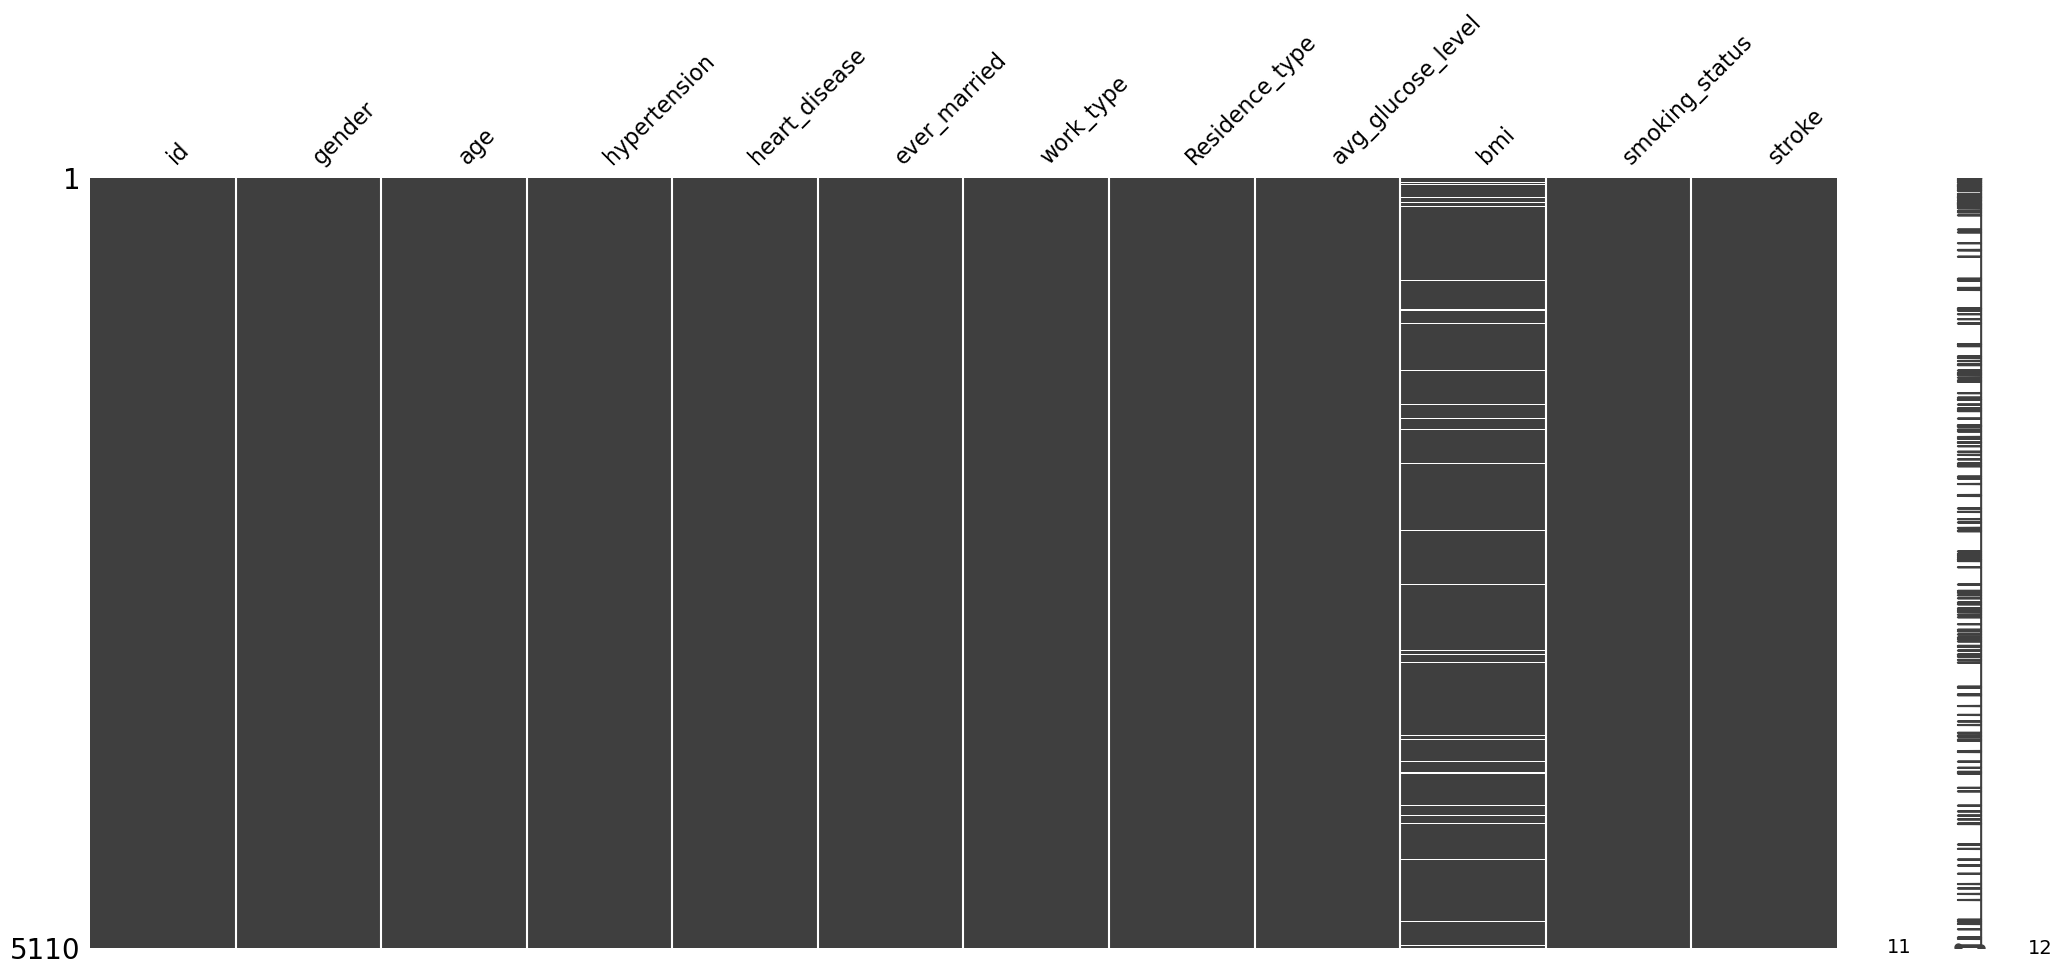

In [17]:
mi.matrix(datos)

A continuación, daremos solución a estos datos ausentes. Como hemos visto, son 201 objetos con el dato de *bmi* faltante sobre un total de 5110, es decir, un 4% aproximadamente de los objetos carecen de valor para este atributo. Al tratarse de un porcentaje bajo podríamos optar por eliminar los objetos pero no lo haremos así. Optaremos por su imputación.  

Seguidamente, al tratarse de una variable con datos reales, compararemos las siguientes estrategias de imputación: media, mediana, valor más frecuente, constante y KNN. 

In [18]:
# Mean Imputation
df_imp1 = datos.copy()
si1 = SimpleImputer(strategy='mean')
df_imp1['bmi'] = si1.fit_transform(df_imp1['bmi'].values.reshape(-1,1))

# Median Imputation
si2 = SimpleImputer(strategy='median')
df_imp2 = datos.copy()
df_imp2['bmi'] = si2.fit_transform(df_imp2['bmi'].values.reshape(-1,1))

# Most Frequent Imputation
si3 = SimpleImputer(strategy='most_frequent')
df_imp3 = datos.copy()
df_imp3['bmi'] = si3.fit_transform(df_imp3['bmi'].values.reshape(-1,1))

# Constant Imputation: elegimos el valor 30
si4 = SimpleImputer(strategy='constant', fill_value=30)
df_imp4 = datos.copy()
df_imp4['bmi'] = si4.fit_transform(df_imp4['bmi'].values.reshape(-1,1))

# KNN Imputation
knni = KNNImputer(n_neighbors=5, weights="uniform")
df_imp5 = datos.copy()
df_imp5['bmi'] = knni.fit_transform(df_imp5['bmi'].values.reshape(-1,1))


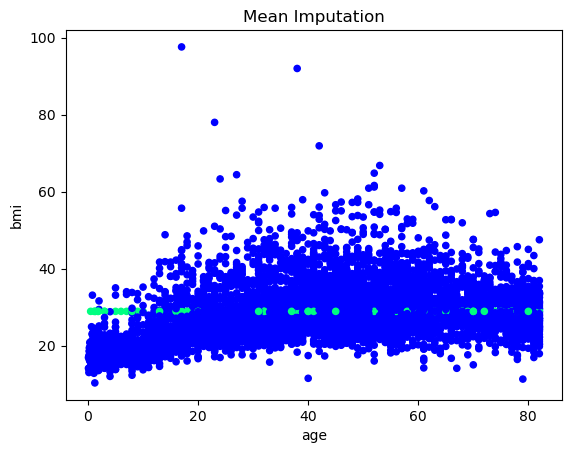

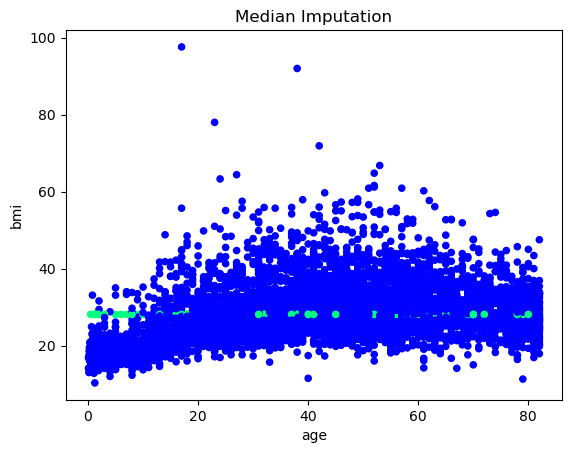

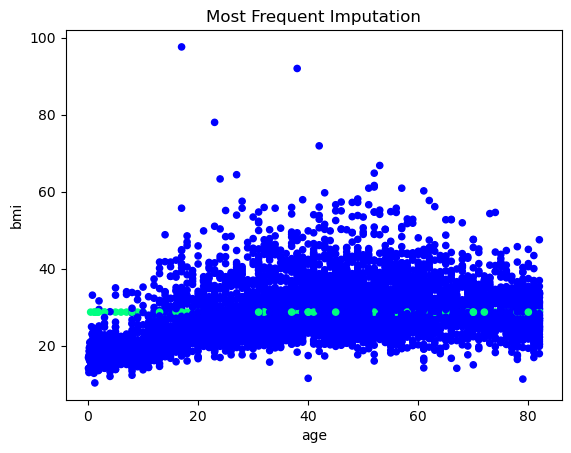

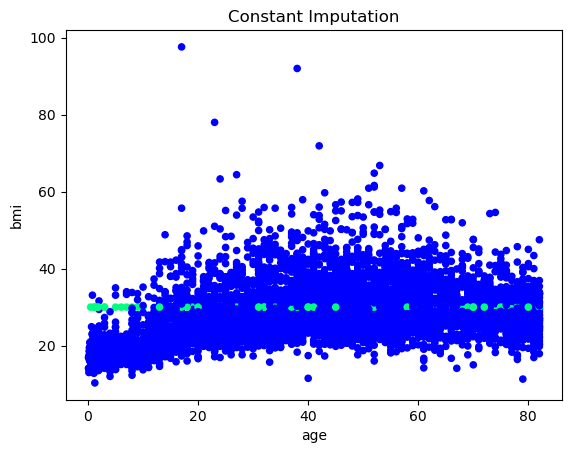

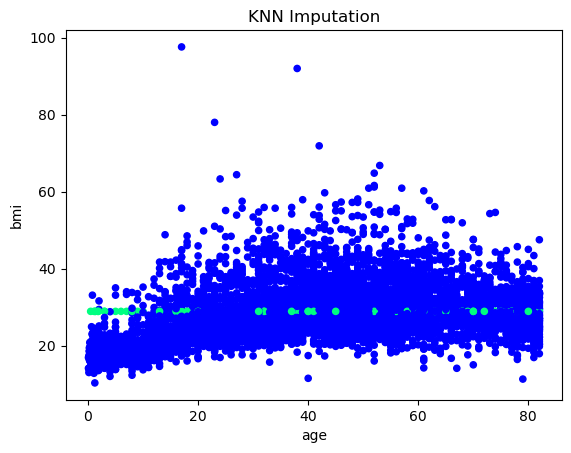

In [19]:
null_values = datos['bmi'].isnull()

fig = plt.Figure()
fig = df_imp1.plot(x="age", y='bmi', kind='scatter', c=null_values, cmap='winter', title='Mean Imputation', colorbar=False)

fig = plt.Figure()
fig = df_imp2.plot(x="age", y='bmi', kind='scatter', c=null_values, cmap='winter', title='Median Imputation', colorbar=False)

fig = plt.Figure()
fig = df_imp3.plot(x="age", y='bmi', kind='scatter', c=null_values, cmap='winter', title='Most Frequent Imputation', colorbar=False)

fig = plt.Figure()
fig = df_imp4.plot(x="age", y='bmi', kind='scatter', c=null_values, cmap='winter', title='Constant Imputation', colorbar=False)

fig = plt.Figure()
fig = df_imp5.plot(x="age", y='bmi', kind='scatter', c=null_values, cmap='winter', title='KNN Imputation', colorbar=False)

A continuación, seleccionamos una de las anteriores (imputación usando la mediana), ya que a simple vista no hay diferencias entre los diversos métodos de imputación:

In [20]:
datos = df_imp2.copy()

#### ***Transformación de datos***

In [21]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


En primer lugar debemos transformar la variable de salida *stroke* para que pase de ser de tipo de dato *int64* a *category* ya que usaremos posteriormente modelos de clasificación. Además, en lugar de utilizar el 0 y el 1 como representaciones de las dos clases existentes, los sustimos por 'No' y 'Yes', respectivamente:

In [22]:
datos['stroke'].mask(datos['stroke'] == 0, 'No', inplace=True)
datos['stroke'].mask(datos['stroke'] == 1, 'Yes', inplace=True)
datos['stroke'] = datos['stroke'].astype('category')

A continuación, convertimos el resto de las columnas a los tipos de datos adecuados. Como hemos visto anteriormente que para poder emplear el conjunto de datos en los diversos métodos, necesitamos que las variables sean de tipo numérico, por lo tanto de tipo int64. Las columnas donde los posibles valores son 0 y 1 o dos posibles valores categóricos como 'Yes' y 'No' y 'Urban' y 'Rural' serán de tipo boolean:

In [23]:
column_list=['gender','ever_married','work_type','Residence_type','smoking_status']
transform_data_to_numeric(datos, column_list)

In [24]:
datos['gender'] = datos['gender'].astype('int64')
datos['hypertension'] = datos['hypertension'].astype('boolean')
datos['heart_disease'] = datos['heart_disease'].astype('boolean')
datos['ever_married'] = datos['ever_married'].astype('boolean')
datos['work_type'] = datos['work_type'].astype('int64')
datos['Residence_type'] = datos['Residence_type'].astype('int64')
datos['smoking_status'] = datos['smoking_status'].astype('int64')

Comprobamos a continuación los nuevos tipos de datos de las columnas: 

In [25]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   int64   
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   boolean 
 4   heart_disease      5110 non-null   boolean 
 5   ever_married       5110 non-null   boolean 
 6   work_type          5110 non-null   int64   
 7   Residence_type     5110 non-null   int64   
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                5110 non-null   float64 
 10  smoking_status     5110 non-null   int64   
 11  stroke             5110 non-null   category
dtypes: boolean(3), category(1), float64(3), int64(5)
memory usage: 354.6 KB


#### ***Estandarización de datos***

En este apartado, comenzaremos dando solución al desbalanceo de las clases del dataset que hemos visto en secciones anteriores. Seguidamente, dividiremos los datos en entrenamiento y en test.

Comenzamos entonces viendo de nuevo el desbalanceo de nuestro dataset: 

stroke
No     4861
Yes     249
Name: count, dtype: int64


<Axes: xlabel='stroke'>

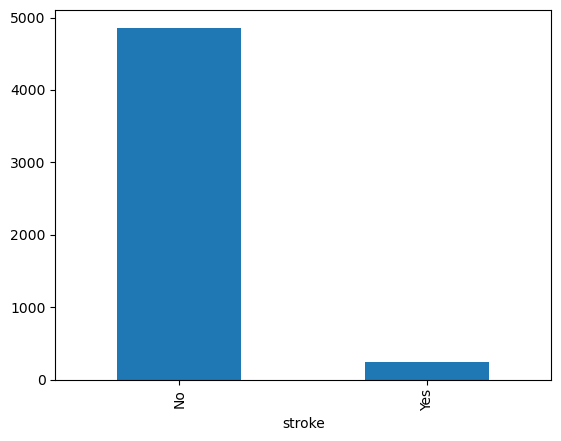

In [26]:
print(datos['stroke'].value_counts())
datos['stroke'].value_counts().plot(kind='bar')

Vemos que aproximadamente el 95% de los datos son de la clase 'No' o 0, es decir, la mayoría de los pacientes no han tenido ningún ataque. Para este caso se optará por el uso de down sampling. 

(249, 12)


<Axes: xlabel='stroke'>

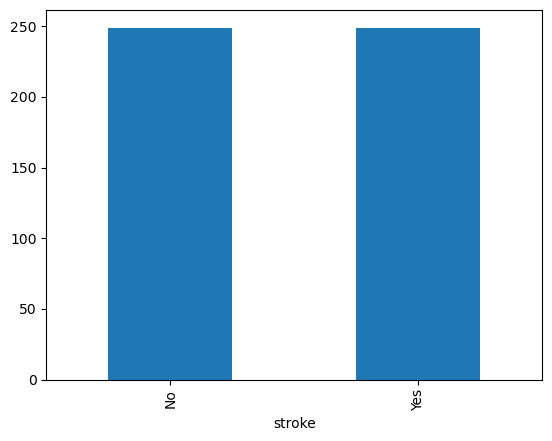

In [27]:
con_ataque = datos[datos['stroke'] == "Yes"]
sin_ataque  = datos[datos['stroke'] == "No"]

sin_ataque_downsample = resample(sin_ataque, replace=True, n_samples=len(con_ataque), random_state=SEED_VALUE)
print(sin_ataque_downsample.shape)

data_downsampled = pd.concat([sin_ataque_downsample, con_ataque])
data_downsampled['stroke'].value_counts().plot(kind='bar')

In [28]:
dataset_train, dataset_test = train_test_split(data_downsampled, test_size=0.2, random_state=SEED_VALUE, stratify=data_downsampled["stroke"])

X_train, y_train = dataset_train.drop('stroke', axis=1), dataset_train['stroke']
X_test, y_test = dataset_test.drop('stroke', axis=1), dataset_test['stroke']

In [29]:
columns_to_scale= X_train.select_dtypes(include=['float64']).columns

scaler = StandardScaler()
scaler.fit(X_train[columns_to_scale])

X_train[columns_to_scale] = scaler.transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

#### ***Selección de variables***

*COMENTAR DE FORMA RESUMIDA LO QUE VIMOS EN EL APARTADO DE INFO DE LOS DATOS*

En primer lugar utilizaremos una codificación one-hot que el modelo de selección de características pueda entender. 

In [30]:
print('Tamaño del conjunto de datos: {}'.format(X_train.shape))

Tamaño del conjunto de datos: (398, 11)


Comenzamos probando la eliminación de variables con varianza baja como sigue:

In [31]:
sel1 = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_new1 = sel1.fit_transform(X_train)
# Obtenemos los nombres de las características seleccionadas
mask1 = sel1.get_support()
selected_features1 = X_train.columns[mask1]
print('Tamaño del conjunto de variables seleccionadas: {}'.format(X_new1.shape))
print("Características seleccionadas: ", selected_features1)

Tamaño del conjunto de variables seleccionadas: (398, 9)
Características seleccionadas:  Index(['id', 'gender', 'age', 'ever_married', 'work_type', 'Residence_type',
       'avg_glucose_level', 'bmi', 'smoking_status'],
      dtype='object')


A continuación, probaremos y compararemos 3 métodos basados en filtros. Comenzamos por el método SelectKBest que elimina todas las características excepto aquellas con mayor puntuación:

Tamaño del conjunto de variables seleccionadas: (398, 6)
Características seleccionadas:  Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'smoking_status'],
      dtype='object')


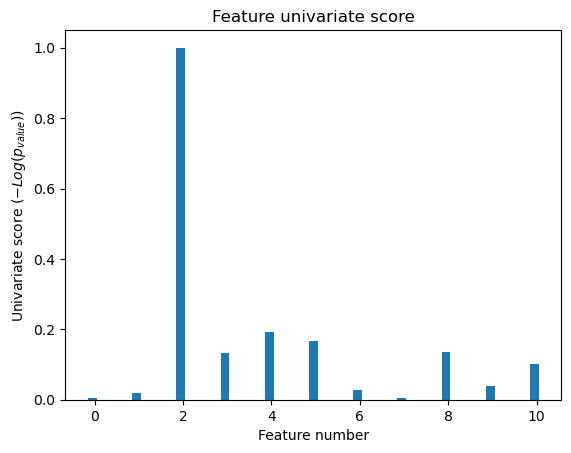

In [32]:
sel2 = SelectKBest(f_classif, k=6)
X_new2 = sel2.fit_transform(X_train, y_train)
print('Tamaño del conjunto de variables seleccionadas: {}'.format(X_new2.shape))
mask2 = sel2.get_support()
selected_features2 = X_train.columns[mask2]
print("Características seleccionadas: ", selected_features2)


scores2 = -np.log10(sel2.pvalues_)
scores2 /= scores2.max()

X_indices2 = np.arange(X_train.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices2 - 0.05, scores2, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

Ahora, probamos SelectPercentile que es un método de selección de características que selecciona las características con los percentiles más altos de la puntuación de la prueba:

Tamaño del conjunto de variables seleccionadas: (398, 6)
Características seleccionadas:  Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'smoking_status'],
      dtype='object')


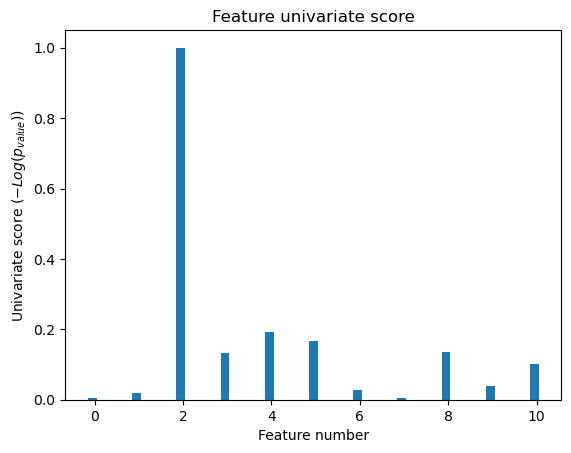

In [33]:
sel3 = SelectPercentile(f_classif, percentile=60)
X_new3 = sel3.fit_transform(X_train, y_train)
print('Tamaño del conjunto de variables seleccionadas: {}'.format(X_new3.shape))
mask3 = sel3.get_support()
selected_features3 = X_train.columns[mask3]
print("Características seleccionadas: ", selected_features3)

scores3 = -np.log10(sel3.pvalues_)
scores3 /= scores3.max()

X_indices3 = np.arange(X_train.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices3 - 0.05, scores3, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

Por último, probamos SelectFpr que elimina las características en base a tasa de falsos positivos:

Tamaño del conjunto de variables seleccionadas: (398, 6)
Características seleccionadas:  Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'smoking_status'],
      dtype='object')


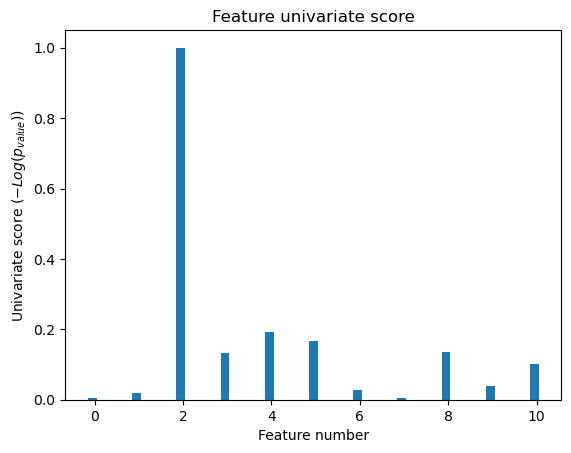

In [34]:
sel4 = SelectFpr(f_classif, alpha=0.05)
X_new4 = sel4.fit_transform(X_train, y_train)
print('Tamaño del conjunto de variables seleccionadas: {}'.format(X_new4.shape))
mask4 = sel4.get_support()
selected_features4 = X_train.columns[mask4]
print("Características seleccionadas: ", selected_features4)

scores4 = -np.log10(sel4.pvalues_)
scores4 /= scores4.max()

X_indices4 = np.arange(X_train.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices4 - 0.05, scores4, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

Tamaño del conjunto de variables seleccionadas: (398, 6)
Características seleccionadas:  Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'smoking_status'],
      dtype='object')


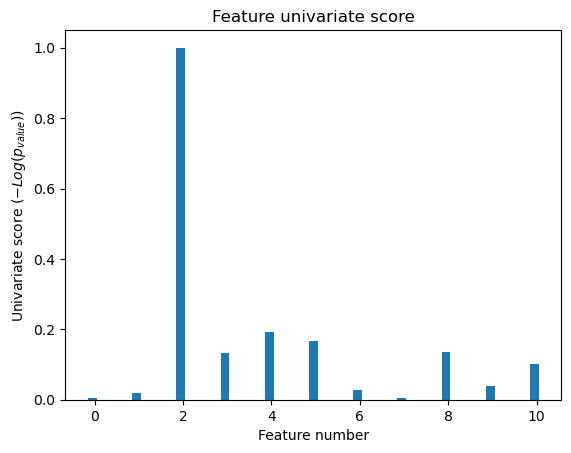

In [35]:
sel5=SelectFwe(f_classif, alpha=0.05)
X_new5 = sel5.fit_transform(X_train, y_train)
print('Tamaño del conjunto de variables seleccionadas: {}'.format(X_new5.shape))
mask5 = sel5.get_support()
selected_features5 = X_train.columns[mask5]
print("Características seleccionadas: ", selected_features4)


scores5 = -np.log10(sel5.pvalues_)
scores5 /= scores5.max()

X_indices5 = np.arange(X_train.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices5 - 0.05, scores5, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

Comprobamos si los 4 arrays de características son iguales:

In [36]:
if np.array_equal(selected_features2, selected_features3) and np.array_equal(selected_features3, selected_features4) and np.array_equal(selected_features4, selected_features5):
    print("Los 4 arrays son iguales.")
else:
    print("Los arrays no son iguales.")

Los 4 arrays son iguales.


In [37]:
print("Características seleccionadas: ", selected_features2.values)

Características seleccionadas:  ['age' 'hypertension' 'heart_disease' 'ever_married' 'avg_glucose_level'
 'smoking_status']


Vemos que los 4 arrays de características son .....

In [38]:
X_train_selected = X_train[selected_features2]
X_test_selected = X_test[selected_features2]
X_train_selected

age  hypertension  heart_disease  ever_married  avg_glucose_level  \
41   -0.075787         False          False         False          -0.861983   
24    0.715826         False          False         False          -0.273469   
174   1.041784         False          False         False          -1.058154   
71    0.529564          True          False         False           1.144356   
181   0.157040         False          False         False          -0.121553   
...        ...           ...            ...           ...                ...   
2549 -0.494876         False          False         False          -0.199835   
3925  0.436433         False          False         False           1.258897   
30    0.063909          True          False         False           1.757228   
1731 -1.565882         False          False          True          -1.129371   
192   0.157040         False          False         False           0.008422   

      smoking_status  
41                 1  
24                 0  
174                0  
71                 0  
181                0  
...              ...  
2549               0  
3925               2  
30                 2  
1731               2  
192                2  

[398 rows x 6 columns]

Selección de características basadas en wrappers

In [39]:
# Create the RFE object and rank each pixel
#svc = SVC(kernel="linear", C=1)
#rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
#X_new6=rfe.fit(X, y)
#ranking = rfe.ranking_.reshape(digits.images[0].shape)
#print('Tamaño del conjunto de variables seleccionadas: {}'.format(X_new6.shape))

# Plot pixel ranking
#plt.matshow(ranking, cmap=plt.cm.Blues)
#plt.colorbar()
#plt.title("Ranking of pixels with RFE")
#plt.show()

### ***Modelado***

#### ***RandomForest***

Comenzamos entrenando un modelo de clasificación con Random Forest:

In [40]:
X_train_selected.head()

age  hypertension  heart_disease  ever_married  avg_glucose_level  \
41  -0.075787         False          False         False          -0.861983   
24   0.715826         False          False         False          -0.273469   
174  1.041784         False          False         False          -1.058154   
71   0.529564          True          False         False           1.144356   
181  0.157040         False          False         False          -0.121553   

     smoking_status  
41                1  
24                0  
174               0  
71                0  
181               0

Comenzamos entrenando el clasificador RandomForest buscando mediante Cross Validation la mejor combinación de los siguientes parámetros: *n_estimators, ....* 

Y las siguientes medidas de calidad para modelos de clasificación: 

##### ***Cross-validation***

In [44]:
# Definición de los hiperparámetros a ajustar
# hiperparametros = {
#     'n_estimators': np.arange(10, 101, 10),
#     'criterion': ['gini', 'entropy', 'log_loss'],
#     'max_depth':  [None, 10, 50, 100],
#     'min_samples_split': np.arange(2, 20, 4),
#     'min_samples_leaf': np.arange(1, 10, 2),
#     'max_features': [None, 'sqrt', 'log2'],
#     'bootstrap': [True, False], 
# }

hiperparametros = {
    'n_estimators': np.arange(10, 30, 10),
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth':  [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt'],
    'bootstrap': [True, False]
}


model_rf = RandomForestClassifier()
# Búsqueda de la mejor combinación de hiperparámetros con validación cruzada
modelCV_rf = GridSearchCV(model_rf, 
                          hiperparametros, 
                          cv=10, 
                          scoring='accuracy',
                          n_jobs=-1, 
                          verbose=1)

np.random.seed(SEED_VALUE)
modelCV_rf.fit(X_train_selected, y_train)

with open('./models/rf_model_v2.pkl', 'wb') as f:
    pickle.dump(modelCV_rf, f, protocol=pickle.HIGHEST_PROTOCOL)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


In [46]:
with open('./models/rf_model_v2.pkl', 'rb') as f:
    modelCV_rf = pickle.load(f)

In [47]:
cv_results_rf = pd.DataFrame(modelCV_rf.cv_results_)
cv_results_rf = cv_results_rf.loc[:, ['param_n_estimators', 
                                      'param_criterion', 
                                      'param_max_depth', 
                                      'param_min_samples_split', 
                                      'param_min_samples_leaf',
                                      'param_max_features', 
                                      'param_bootstrap', 
                                      'mean_test_score', 
                                      'std_test_score', 
                                      'rank_test_score']]
cv_results_rf.sort_values(by='rank_test_score', ascending=True)

param_n_estimators param_criterion param_max_depth  \
220                 10         entropy              10   
13                  20            gini            None   
79                  20         entropy              10   
122                 10        log_loss              10   
76                  10         entropy              10   
..                 ...             ...             ...   
179                 20            gini              20   
160                 10            gini              10   
144                 10            gini            None   
177                 20            gini              20   
176                 10            gini              20   

    param_min_samples_split param_min_samples_leaf param_max_features  \
220                       2                      2               sqrt   
13                        2                      2               sqrt   
79                        5                      2               sqrt   
122                       5                      1               sqrt   
76                        2                      2               sqrt   
..                      ...                    ...                ...   
179                       5                      1               None   
160                       2                      1               None   
144                       2                      1               None   
177                       2                      1               None   
176                       2                      1               None   

    param_bootstrap  mean_test_score  std_test_score  rank_test_score  
220           False         0.751090        0.071706                1  
13             True         0.746026        0.067511                2  
79             True         0.743718        0.059948                3  
122            True         0.743654        0.067112                4  
76             True         0.741026        0.066091                5  
..              ...              ...             ...              ...  
179           False         0.637949        0.068647              284  
160           False         0.637949        0.050803              285  
144           False         0.633077        0.049530              286  
177           False         0.630449        0.062553              287  
176           False         0.620385        0.063038              288  

[288 rows x 10 columns]

In [48]:
# Mejores hiperparámetros encontrados
print(modelCV_rf.best_params_)

# Mejor puntuación obtenida
print(modelCV_rf.best_score_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}
0.7510897435897436


In [49]:
rf = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=50, max_features='log2', min_samples_leaf=10, min_samples_split=20, n_estimators=20)
np.random.seed(SEED_VALUE) 
rf.fit(X_train_selected, y_train)

RandomForestClassifier(max_depth=50, max_features='log2', min_samples_leaf=10,
                       min_samples_split=20, n_estimators=20)

In [50]:
np.random.seed(SEED_VALUE) 
y_pred_rf = rf.predict(X_test_selected)

In [51]:
conf_matrix_rf = confusion_matrix(y_true=y_test, y_pred=y_pred_rf)
print('La matriz de confusión obtenida por el RandomForest: \n{}'.format(conf_matrix_rf))

La matriz de confusión obtenida por el RandomForest: 
[[37 13]
 [ 9 41]]


In [52]:
# La matriz de confusión obtenida por el RandomForest: 
# [[38 12]
#  [13 37]]

In [53]:
precision = precision_score(y_test, y_pred_rf, pos_label='Yes')
print('La precisión del modelo es {:.3f}'.format(precision))
recall = recall_score(y_test, y_pred_rf, pos_label='Yes')
print('El recall del modelo es {:.3f}'.format(recall))
f1 = f1_score(y_test, y_pred_rf, pos_label='Yes')
print('El F1-score del modelo es {:.3f}'.format(f1))
accuracy = accuracy_score(y_test, y_pred_rf)
print('La accuracy del modelo es {:.3f}'.format(accuracy))

La precisión del modelo es 0.759
El recall del modelo es 0.820
El F1-score del modelo es 0.788
La accuracy del modelo es 0.780


In [54]:
y_test_num = y_test.map({'No': 0, 'Yes': 1})
y_pred_rf_num = np.where(y_pred_rf == 'Yes', 1, 0)

fpr_svm, tpr_svm, thresholds = roc_curve(y_test_num, y_pred_rf_num, pos_label=1)
print("AUC del RandomForest: {}".format(auc(fpr_svm, tpr_svm)))

AUC del RandomForest: 0.7799999999999999


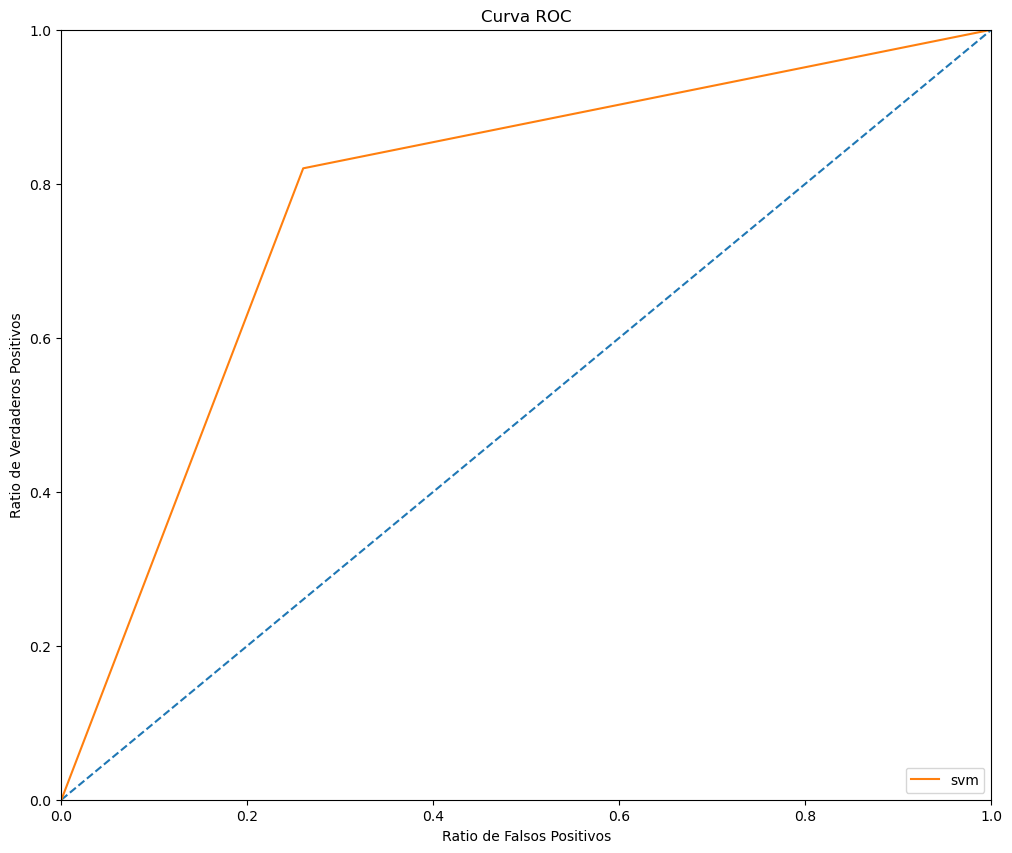

In [55]:
import matplotlib.pyplot as plt

# Creamos la figura que contendrá la curva ROC
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

# Conectar las diagonales
ax.plot([0, 1], [0, 1], ls="--")

# Establecer los ejes
ax.set_xlabel('Ratio de Falsos Positivos')
ax.set_ylabel('Ratio de Verdaderos Positivos')
ax.set_title('Curva ROC')

# Establecemos los límites del grafo
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

# Pintamos el grafo
ax.plot(fpr_svm, tpr_svm, label = "svm")

# Añadimos la leyenda
ax.legend(loc="lower right")
plt.show()

In [56]:
# La matriz de confusión obtenida por el RandomForest: 
# [[ 2 48]
#  [ 0 50]]

# La precisión del modelo es 0.510
# El recall del modelo es 1.000
# El F1-score del modelo es 0.676
# La accuracy del modelo es 0.520

#### ***LogisticRegression***

In [57]:
# Definición de los hiperparámetros a ajustar

hiperparametros_lg = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['newton-cg', 'newton-cholesky','lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'class_weight': [None, 'balanced'],
    'fit_intercept': [True, False]

}


model_lg = LogisticRegression(max_iter=1000)

# Búsqueda de la mejor combinación de hiperparámetros con validación cruzada
modelCV_lg = GridSearchCV(model_lg, 
                          hiperparametros_lg, 
                          cv=10, 
                          scoring='accuracy',
                          n_jobs=-1, 
                          verbose=1)

np.random.seed(SEED_VALUE)
modelCV_lg.fit(X_train_selected, y_train)

with open('./models/lg_model.pkl', 'wb') as f:
    pickle.dump(modelCV_lg, f, protocol=pickle.HIGHEST_PROTOCOL)

Fitting 10 folds for each of 2592 candidates, totalling 25920 fits


/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/lin

/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
13320 fits failed out of a total of 25920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/alourido/anaconda3/lib/python3.11/site-packages/sklearn/linear_m

In [58]:
cv_results_lg = pd.DataFrame(modelCV_lg.cv_results_)
cv_results_lg = cv_results_lg.loc[:, ['param_C',
                                      'param_penalty',
                                      'param_solver',
                                      'param_multi_class',
                                      'param_class_weight',
                                      'param_fit_intercept', 
                                      'mean_test_score', 
                                      'std_test_score', 
                                      'rank_test_score']]
cv_results_lg.sort_values(by='rank_test_score', ascending=True)

param_C param_penalty     param_solver param_multi_class  \
1136     0.1            l2            lbfgs       multinomial   
1139     0.1            l2             saga       multinomial   
1134     0.1            l2        newton-cg       multinomial   
990      0.1            l2        newton-cg       multinomial   
992      0.1            l2            lbfgs       multinomial   
...      ...           ...              ...               ...   
1353       1            l2        liblinear       multinomial   
1351       1            l2  newton-cholesky       multinomial   
1348       1            l1              sag       multinomial   
1365       1          None        liblinear       multinomial   
0     0.0001            l1        newton-cg              auto   

     param_class_weight param_fit_intercept  mean_test_score  std_test_score  \
1136           balanced               False          0.76609        0.059292   
1139           balanced               False          0.76609        0.059292   
1134           balanced               False          0.76609        0.059292   
990                None               False          0.76609        0.059292   
992                None               False          0.76609        0.059292   
...                 ...                 ...              ...             ...   
1353           balanced                True              NaN             NaN   
1351           balanced                True              NaN             NaN   
1348           balanced                True              NaN             NaN   
1365           balanced                True              NaN             NaN   
0                  None                True              NaN             NaN   

      rank_test_score  
1136                1  
1139                1  
1134                1  
990                 1  
992                 1  
...               ...  
1353             1261  
1351             1261  
1348             1261  
1365             1261  
0                1261  

[2592 rows x 9 columns]

In [ ]:
cv_results_best_lg = cv_results_lg[cv_results_lg['rank_test_score'] == 1]
cv_results_best_lg

In [ ]:
# Mejores hiperparámetros encontrados
print(modelCV_lg.best_params_)

# Mejor puntuación obtenida
print(modelCV_lg.best_score_)

In [ ]:
lg = LogisticRegression(**modelCV_lg.best_params_)
np.random.seed(SEED_VALUE)
lg.fit(X_train_selected, y_train)

In [ ]:
np.random.seed(SEED_VALUE)
y_pred_lg = lg.predict(X_test_selected)

In [ ]:
for index, row in cv_results_best_lg.iterrows():
    print('Los mejores hiperparámetros encontrados son: {}'.format(row[['param_solver']]))
    print('\n')
    model = LogisticRegression(C=row['param_C'], penalty=row['param_penalty'], 
                               solver=row['param_solver'], multi_class=row['param_multi_class'], 
                               class_weight=row['param_class_weight'] if row['param_class_weight'] != 'None' else None,
                               fit_intercept=row['param_fit_intercept'])
    np.random.seed(SEED_VALUE)
    model.fit(X_train_selected, y_train)

    np.random.seed(SEED_VALUE)
    y_pred_lg = model.predict(X_test_selected)

    conf_matrix_lg = confusion_matrix(y_true=y_test, y_pred=y_pred_lg)
    print('La matriz de confusión obtenida por el LogisticRegression: \n{}'.format(conf_matrix_lg))

    accuracy = accuracy_score(y_test, y_pred_lg)
    print('La accuracy del modelo es {:.3f}'.format(accuracy))
    print('\n')

In [35]:
conf_matrix_lg = confusion_matrix(y_true=y_test, y_pred=y_pred_lg)
print('La matriz de confusión obtenida por el LogisticRegression: \n{}'.format(conf_matrix_lg))

La matriz de confusión obtenida por el LogisticRegression: 
[[38 12]
 [10 40]]


In [36]:
precision = precision_score(y_test, y_pred_lg, pos_label='Yes')
print('La precisión del modelo es {:.3f}'.format(precision))
recall = recall_score(y_test, y_pred_lg, pos_label='Yes')
print('El recall del modelo es {:.3f}'.format(recall))
f1 = f1_score(y_test, y_pred_lg, pos_label='Yes')
print('El F1-score del modelo es {:.3f}'.format(f1))
accuracy = accuracy_score(y_test, y_pred_lg)
print('La accuracy del modelo es {:.3f}'.format(accuracy))

La precisión del modelo es 0.769
El recall del modelo es 0.800
El F1-score del modelo es 0.784
La accuracy del modelo es 0.780


In [37]:
y_test_num = y_test.map({'No': 0, 'Yes': 1})
y_pred_lg_num = np.where(y_pred_lg == 'Yes', 1, 0)

fpr_svm, tpr_svm, thresholds = roc_curve(y_test_num, y_pred_lg_num, pos_label=1)
print("AUC del LogisticRegression: {}".format(auc(fpr_svm, tpr_svm)))

AUC del LogisticRegression: 0.78


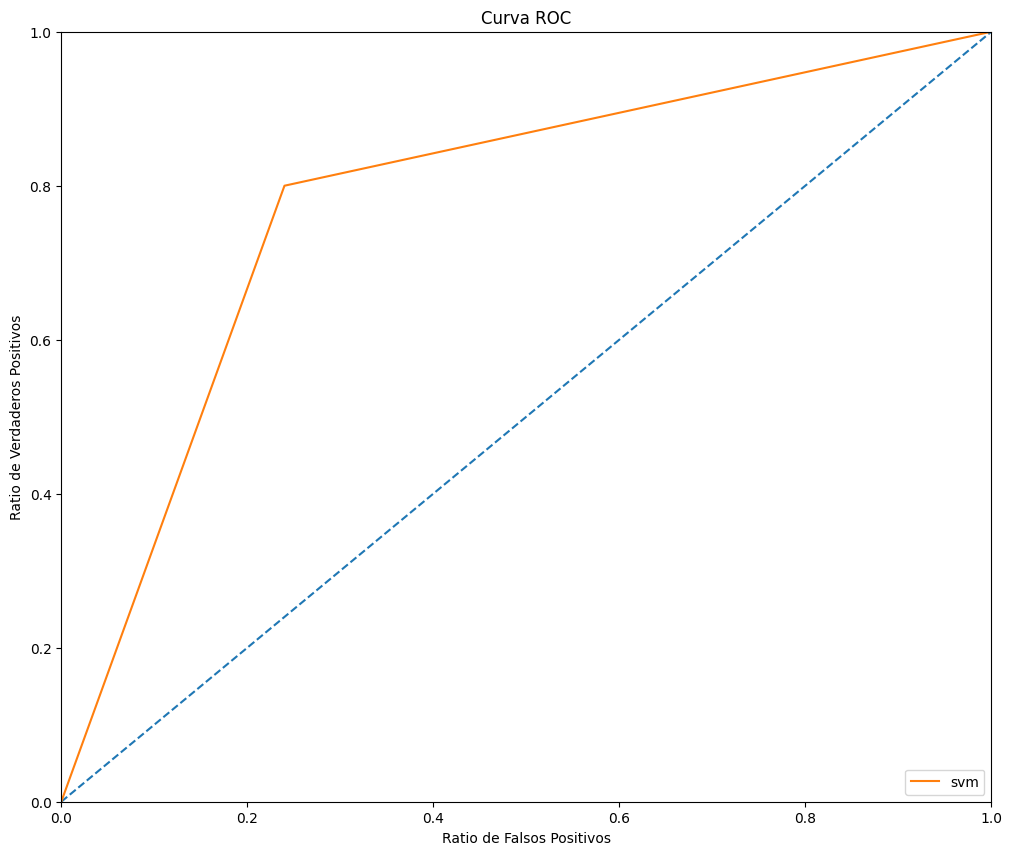

In [38]:
import matplotlib.pyplot as plt

# Creamos la figura que contendrá la curva ROC
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

# Conectar las diagonales
ax.plot([0, 1], [0, 1], ls="--")

# Establecer los ejes
ax.set_xlabel('Ratio de Falsos Positivos')
ax.set_ylabel('Ratio de Verdaderos Positivos')
ax.set_title('Curva ROC')

# Establecemos los límites del grafo
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

# Pintamos el grafo
ax.plot(fpr_svm, tpr_svm, label = "svm")

# Añadimos la leyenda
ax.legend(loc="lower right")
plt.show()

**Función Hold-out**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=SEED_VALUE)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(298, 11) (298,)
(200, 11) (200,)


In [ ]:

clf = SVC(kernel='linear', C=1).fit(X_train, y_train)   # Nota: fijamos el valor de C=1 para este ejemplo
print(clf.score(X_test, y_test))

0.765


In [ ]:

clf = SVC(kernel='linear', C=1, random_state=SEED_VALUE)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)

[0.75       0.71       0.76       0.75757576 0.75757576]


In [ ]:
print("La CV obtuvo una accuracy media de {:.3f} con desviación estándar igual a {:.3f}".format(scores.mean(), scores.std()))

La CV obtuvo una accuracy media de 0.747 con desviación estándar igual a 0.019


In [ ]:
scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print(scores)

[0.74876897 0.709971   0.75990396 0.75332226 0.75735294]


In [ ]:
scores = cross_validate(clf, X, y, scoring=scoring)
print(sorted(scores.keys()))
print(scores['test_recall_macro'])

NameError: name 'scoring' is not defined

### ***Discusión de resultados***

In [ ]:
# AÑADIR GRAFICO DE BARRA COMPARATIVO DE LOS 4 CLASIFICADORES

### ***Conclusiones***